In [17]:
# 1. 기본 라이브러리 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [18]:
# 2. 사용자 정의 함수 ImageConv(inp, mask) 정의하기
def ImageConv(inp, mask):
    n = mask.shape[0]
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    inp_pad = np.zeros((h+2*k, w+2*k))
    inp_pad[k:h+k, k:w+k] = inp
    out = np.zeros((h+2*k, w+2*k))
    for i in range(k, h+k):
        for j in range(k, w+k):
            temp = inp_pad[i-k:i+k+1, j-k:j+k+1]
            for x in range(0,n):
                for y in range(0,n):
                    out[i,j] += temp[x,y]*mask[x,y]
    out = out[k:h+k, k:w+k]
    return np.uint8(out)

In [19]:
# 3. (numpy) 필터 (mask1~mask2) 생성하기
n = 3 # mask의 너비
mask1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
mask2 = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])

print(mask1)
print(mask2)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


TypeError: Image data of dtype object cannot be converted to float

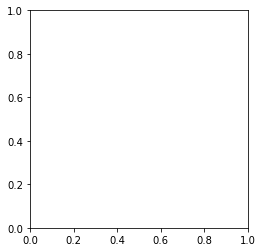

In [24]:
# 4. 'dark_city.jpg'를 흑백영상(inp)으로 불러오기
inp = cv2.imread('images/dark_city.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(inp,cmap='gray')

In [21]:
# 5. ImageConv(inp,mask)를 사용하여 결과 출력하기
out1 = ImageConv(inp, mask1)
out2 = ImageConv(inp, mask2)

AttributeError: 'NoneType' object has no attribute 'shape'

In [25]:
plt.figure(figsize=(20,10)) # 크기 조정
plt.subplot(1,3,1); plt.imshow(inp,cmap='gray')
plt.subplot(1,3,2); plt.imshow(out1,cmap='gray')
plt.subplot(1,3,3); plt.imshow(out2,cmap='gray')\

SyntaxError: unexpected EOF while parsing (<ipython-input-25-cbe7e4e30945>, line 4)